In [155]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from mpl_toolkits.mplot3d import Axes3D
import plotly.graph_objects as go




In [156]:
df_merged = pd.read_csv('D:\\Projo\\Projet-Data-IA\\Merged_all_tables\\merged_all_tables.csv', sep=',')

In [157]:

# def minutes_to_hours_minutes(minutes):
#     hours = int(minutes / 60)
#     remaining_minutes = minutes % 60
#     return f"{hours} heures {remaining_minutes} minutes"

# df_merged['runtimeMinutes'] = df_merged['runtimeMinutes'].apply(minutes_to_hours_minutes)
# # rename de la colonne runtimeMinutes à duration
# df_merged.rename(columns={'runtimeMinutes': 'duration'}, inplace=True)

In [158]:
# Jointures des tables title et merged_all_tables pour récupérer les valeurs de la colonne genres

df_del_cols = pd.read_csv('D:\\Projo\\Projet-Data-IA\\title_del_cols.csv', sep=',')
df_merged = pd.merge(df_merged, df_del_cols, left_on='titleId', right_on='tconst', how='left')

In [159]:
def clean_actors_list(actors_list):
    # Convertir la liste en un ensemble pour supprimer les doublons, puis trier
    unique_actors = sorted(set(actors_list))
    # Convertir l'ensemble trié en une chaîne de caractères séparée par des virgules
    cleaned_list = ', '.join(unique_actors)
    return cleaned_list

# Appliquer la fonction à chaque élément de la colonne "Actors_Actresses"
df_merged['Actors_Actresses'] = df_merged['Actors_Actresses'].apply(eval).apply(clean_actors_list)
df_merged['production_companies_name'] = df_merged['production_companies_name'].apply(eval).apply(clean_actors_list)

# Suppression des colonnes inutiles pour l'analyse
df_merged.drop(columns=['overview', 'poster_path', 'backdrop_path'], inplace=True)

df_merged.head(50)

,titleId,title,averageRating,numVotes,startYear,runtimeMinutes,genres_x,popularity,production_companies_name,Director_name,Actors_Actresses,tconst,genres_y
0,tt0012134,El Dorado,7.1,486.0,1921.0,100.0,Drama,0.866,"Gaumont, Gaumont Série Pax",Marcel L'Herbier,"Claire Prélia, Georges Paulais, Jaque Catelain...",tt0012134,Drama
1,tt0012187,Le fruit défendu,6.5,192.0,1921.0,87.0,Drama,0.903,Paramount,Cecil B. DeMille,"Agnes Ayres, Bertram Johns, Clarence Burton, F...",tt0012187,Drama
2,tt0012408,Le signal de l'amour,6.4,409.0,1921.0,89.0,Drama,1.312,"Mary Pickford Company, United Artists",Frances Marion,"Albert Prisco, Eddie Phillips, Evelyn Dumo, Fr...",tt0012408,Drama
3,tt0012745,La terre,6.7,179.0,1921.0,97.0,Drama,1.087,Pathé Frères,André Antoine,"Armand Bour, Berthe Bovy, Emile Desjardins, Ge...",tt0012745,Drama
4,tt0012763,Le coeur sur la main,7.1,1944.0,1921.0,99.0,Drama,1.675,Inspiration Pictures,Henry King,"Edmund Gurney, Ernest Torrence, Forrest Robins...",tt0012763,Drama
5,tt0012973,La Terre qui flambe,6.9,776.0,1922.0,98.0,Drama,1.736,"Deulig Film, Goron Film",F.W. Murnau,"Alfred Abel, Eduard von Winterstein, Elsa Wagn...",tt0012973,Drama
6,tt0013169,Aimez-vous les uns les autres,6.5,552.0,1922.0,105.0,Drama,1.400,Primus Film,Carl Theodor Dreyer,"Adele Reuter-Eichberg, Emmy Wyda, Hugo Döblin,...",tt0013169,Drama
7,tt0013372,Le réquisitoire,6.3,509.0,1922.0,100.0,Drama,1.726,Paramount,Cecil B. DeMille,"Casson Ferguson, Dorothy Cumming, Edythe Chapm...",tt0013372,Drama
8,tt0013450,Olivier Twist,6.6,940.0,1922.0,98.0,Drama,1.848,"First National Pictures, Jackie Coogan Product...",Frank Lloyd,"Aggie Herring, Carl Stockdale, Edouard Trebaol...",tt0013450,Drama
9,tt0013619,Le sixième commandement,5.9,242.0,1922.0,150.0,Drama,1.489,Sascha-Film,Michael Curtiz,"Erika Wagner, Franz Herterich, Georg Reimers, ...",tt0013619,Drama


In [160]:
df_merged['genres_y'].value_counts()

genres_y
Drama          4459
Comedy         1533
Horror          251
Thriller        211
Western         206
Documentary     103
Action           75
Adventure        71
Romance          43
Family           30
Crime            26
Musical          25
Sci-Fi           17
War               8
Animation         7
Mystery           7
Biography         6
Fantasy           6
History           5
Name: count, dtype: int64

In [161]:
df_merged['genres_x'].value_counts()

genres_x
Drama          4459
Comedy         1533
Horror          251
Thriller        211
Western         206
Documentary     103
Action           75
Adventure        71
Romance          43
Family           30
Crime            26
Musical          25
Sci-Fi           17
War               8
Animation         7
Mystery           7
Biography         6
Fantasy           6
History           5
Name: count, dtype: int64

In [162]:
df_merged.dtypes


titleId                       object
title                         object
averageRating                float64
numVotes                     float64
startYear                    float64
runtimeMinutes               float64
genres_x                      object
popularity                   float64
production_companies_name     object
Director_name                 object
Actors_Actresses              object
tconst                        object
genres_y                      object
dtype: object

In [163]:
df_merged.describe()

,averageRating,numVotes,startYear,runtimeMinutes,popularity
count,7089.000000,7.089000e+03,7089.000000,7089.000000,7089.000000
mean,6.422359,8.777547e+03,1992.185922,102.564960,4.874802
std,0.736305,6.200403e+04,24.903275,15.557167,18.221225
min,5.000000,1.010000e+02,1921.000000,85.000000,0.600000
25%,5.900000,2.790000e+02,1971.000000,92.000000,1.372000
50%,6.400000,6.860000e+02,1999.000000,99.000000,2.289000
75%,6.900000,2.314000e+03,2014.000000,109.000000,5.090000
max,9.300000,2.878611e+06,2024.000000,240.000000,1107.559000


In [164]:
# Les 20 films les mieux notés de 1980 à 2024

df_sorted_avg =  df_merged.sort_values(by='averageRating', ascending=False)
df_sorted_avg.head(20)

,titleId,title,averageRating,numVotes,startYear,runtimeMinutes,genres_x,popularity,production_companies_name,Director_name,Actors_Actresses,tconst,genres_y
2924,tt0111161,Les évadés,9.3,2878611.0,1994.0,142.0,Drama,84.139,Castle Rock Entertainment,Frank Darabont,"Bob Gunton, Clancy Brown, Gil Bellows, James W...",tt0111161,Drama
5669,tt21093976,National Theatre Live: Prima Facie,9.1,1734.0,2022.0,120.0,Drama,4.184,"Echo Lake Entertainment, Empire Street Product...",Justin Martin,Jodie Comer,tt21093976,Drama
4722,tt11737772,Chal Mera Putt 2,8.9,3432.0,2020.0,124.0,Drama,1.960,"Gillz Network, Omjee Star Studios, Rhythm Boyz...",Janjot Singh,"Agha Majid, Akram Udaas, Amrinder Gill, Garry ...",tt11737772,Drama
6662,tt6857412,Cinema Twain,8.8,111.0,2019.0,90.0,Comedy,1.541,Val Art LTD,Val Kilmer,Val Kilmer,tt6857412,Comedy
3208,tt0137523,Fight Club,8.8,2314328.0,1999.0,139.0,Drama,58.660,"20th Century Fox, Atman Entertainment, Fox 200...",David Fincher,"Brad Pitt, Christina Cabot, David Andrews, Edw...",tt0137523,Drama
1865,tt0073486,Vol au-dessus d'un nid de coucou,8.7,1069628.0,1975.0,133.0,Drama,35.316,Fantasy Films,Milos Forman,"Alonzo Brown, Danny DeVito, Dean R. Brooks, Ja...",tt0073486,Drama
6848,tt8176054,Pariyerum Perumal,8.7,18342.0,2018.0,154.0,Drama,3.730,"Lyca Productions, Neelam Productions",Mari Selvaraj,"'Poo' Ram, Anandhi, Anthony Dasan, G. Marimuth...",tt8176054,Drama
4560,tt10811166,The Kashmir Files,8.6,573495.0,2022.0,170.0,Drama,7.820,"Abhishek Agarwal Arts, Zee Studios",Vivek Agnihotri,"Anupam Kher, Bhasha Sumbli, Chinmay Mandlekar,...",tt10811166,Drama
4499,tt10469118,Hellaro,8.6,1586.0,2019.0,121.0,Drama,1.363,Harfanmaula Films,Abhishek Shah,"Aarjav Trivedi, Brinda Trivedi, Firoz Arab, Ja...",tt10469118,Drama
2764,tt0103767,Baraka,8.5,40917.0,1992.0,96.0,Documentary,10.121,Magidson Films,Ron Fricke,Patrick Disanto,tt0103767,Documentary


In [165]:
# Moyenne durée des 20 films les mieux notés
df_mean_avg = df_sorted_avg['runtimeMinutes'].head(20).mean()
df_mean_avg.round()

127.0

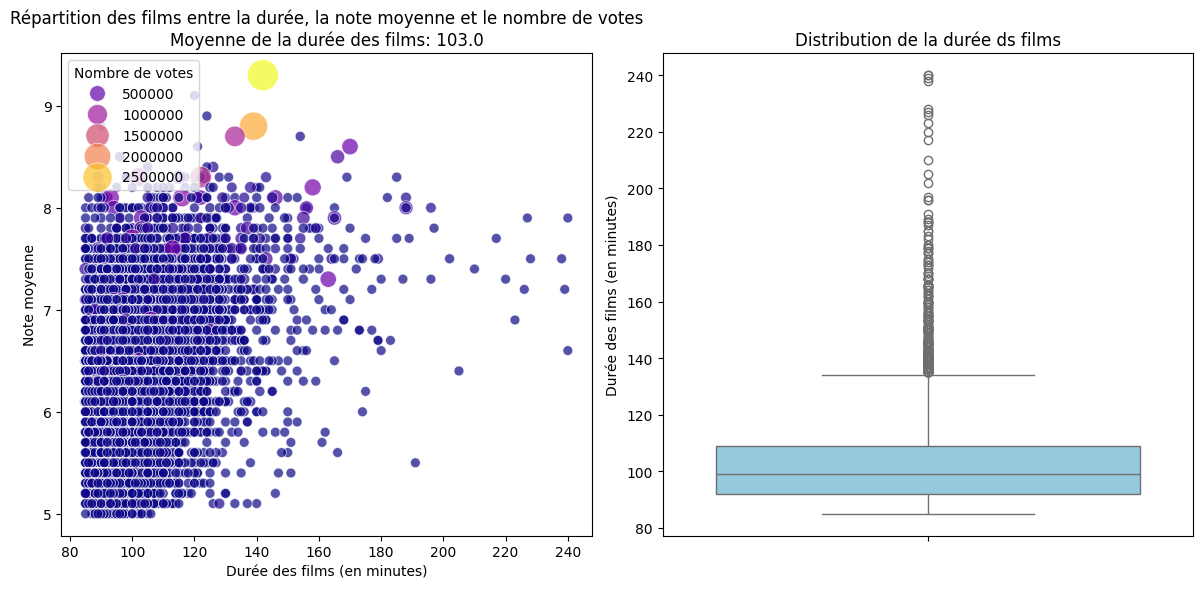

In [166]:
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Les n premiers films les mieux notés
df_top_20 = df_sorted_avg.sort_values(by='averageRating', ascending=False).head(6995)

# Nuage de points avec 'runtimeMinutes' sur l'axe x, 'averageRating' sur l'axe y et 'numVotes' comme taille des points
sns.scatterplot(data=df_top_20, x='runtimeMinutes', y='averageRating', hue='numVotes', palette='plasma', size='numVotes', sizes=(50, 500), alpha=0.7, ax=axes[0])

# Barre de couleur pour expliquer la signification des couleurs
axes[0].legend(title='Nombre de votes', loc='upper left')

axes[0].set_xlabel('Durée des films (en minutes)')
axes[0].set_ylabel('Note moyenne')
axes[0].set_title(f'Répartition des films entre la durée, la note moyenne et le nombre de votes\nMoyenne de la durée des films: {df_top_20["runtimeMinutes"].mean().round()}')

# Graphique boxplot pour 'runtimeMinutes'
sns.boxplot(data=df_top_20, y='runtimeMinutes', ax=axes[1], color='skyblue')

# Ajouter des labels et un titre
axes[1].set_ylabel('Durée des films (en minutes)')
axes[1].set_title('Distribution de la durée ds films')


plt.tight_layout()
plt.show()



* On peut voir que la majorité des films de 500 000 à 1 000 000 de nombres de votes se situe entre 110 Minutes et 140 Minutes

In [167]:
# Top 20 des films les plus votés
df_sorted_numVotes =  df_merged.sort_values(by='numVotes', ascending=False)
df_sorted_numVotes.head(20)

,titleId,title,averageRating,numVotes,startYear,runtimeMinutes,genres_x,popularity,production_companies_name,Director_name,Actors_Actresses,tconst,genres_y
2924,tt0111161,Les évadés,9.3,2878611.0,1994.0,142.0,Drama,84.139,Castle Rock Entertainment,Frank Darabont,"Bob Gunton, Clancy Brown, Gil Bellows, James W...",tt0111161,Drama
3208,tt0137523,Fight Club,8.8,2314328.0,1999.0,139.0,Drama,58.660,"20th Century Fox, Atman Entertainment, Fox 200...",David Fincher,"Brad Pitt, Christina Cabot, David Andrews, Edw...",tt0137523,Drama
3342,tt0169547,American Beauty,8.3,1208340.0,1999.0,122.0,Drama,26.384,"DreamWorks Pictures, Jinks/Cohen Company",Sam Mendes,"Allison Janney, Annette Bening, Chris Cooper, ...",tt0169547,Drama
1865,tt0073486,Vol au-dessus d'un nid de coucou,8.7,1069628.0,1975.0,133.0,Drama,35.316,Fantasy Films,Milos Forman,"Alonzo Brown, Danny DeVito, Dean R. Brooks, Ja...",tt0073486,Drama
3376,tt0180093,Requiem for a Dream,8.3,896207.0,2000.0,102.0,Drama,14.092,"Artisan Entertainment, Protozoa Pictures, Thou...",Darren Aronofsky,"Christopher McDonald, Ellen Burstyn, Janet Sar...",tt0180093,Drama
4638,tt1119646,Very Bad Trip,7.7,843116.0,2009.0,100.0,Comedy,73.308,"Green Hat Films, Legendary Pictures, Warner Br...",Todd Phillips,"Bradley Cooper, Ed Helms, Heather Graham, Jeff...",tt1119646,Comedy
4789,tt1205489,Gran Torino,8.1,813342.0,2008.0,116.0,Drama,21.048,"Double Nickel Entertainment, Gerber Pictures, ...",Clint Eastwood,"Ahney Her, Bee Vang, Brian Haley, Brian Howe, ...",tt1205489,Drama
3039,tt0117951,Trainspotting,8.1,723965.0,1996.0,93.0,Drama,20.969,"Channel Four Films, Figment Films, Film4 Produ...",Danny Boyle,"Eileen Nicholas, Ewan McGregor, Ewen Bremner, ...",tt0117951,Drama
5354,tt1637725,Ted,6.9,655105.0,2012.0,106.0,Comedy,56.556,"Bluegrass Films, Fuzzy Door Productions, MRC, ...",Seth MacFarlane,"Aedin Mincks, Bill Smitrovich, Giovanni Ribisi...",tt1637725,Comedy
4163,tt0469494,There Will Be Blood,8.2,639266.0,2007.0,158.0,Drama,18.794,"Ghoulardi Film Company, Miramax, Paramount Van...",Paul Thomas Anderson,"Barry Del Sherman, Ciarán Hinds, Daniel Day-Le...",tt0469494,Drama


In [168]:
df_merged.value_counts('genres')

KeyError: 'genres'

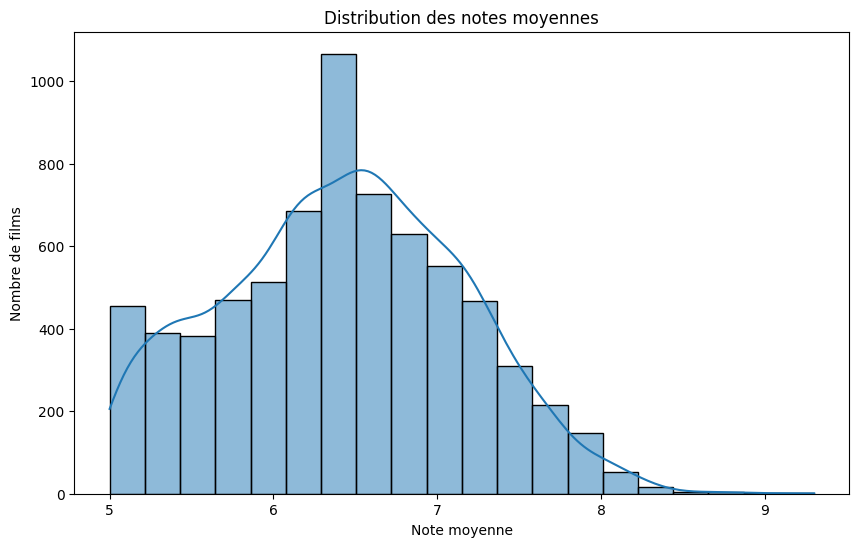

In [ ]:
# Moyenne des notes
plt.figure(figsize=(10, 6))
sns.histplot(df_merged['averageRating'], bins=20, kde=True)
plt.title('Distribution des notes moyennes')
plt.xlabel('Note moyenne')
plt.ylabel('Nombre de films')
plt.show()


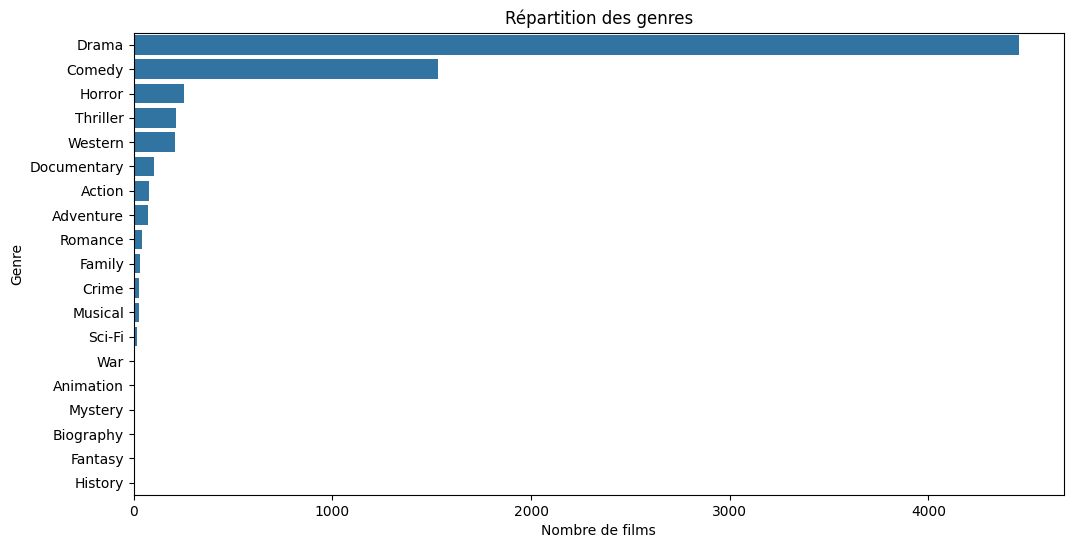

In [ ]:
# Diagramme en barres pour les genres
plt.figure(figsize=(12, 6))
sns.countplot(y=df_merged['genres'], order = df_merged['genres'].value_counts().index)
plt.title('Répartition des genres')
plt.xlabel('Nombre de films')
plt.ylabel('Genre')
plt.show()


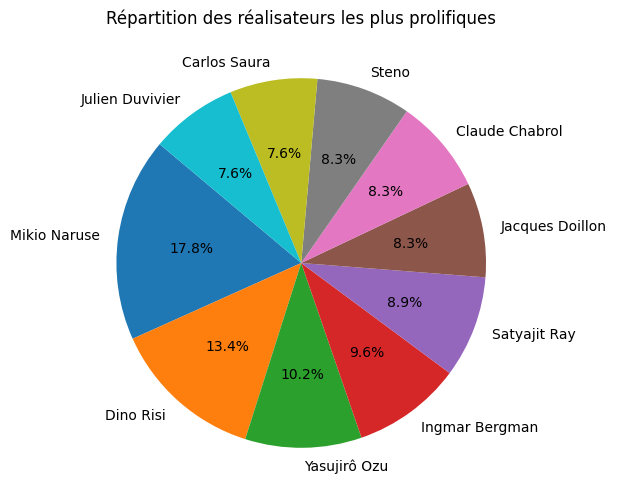

In [ ]:
# les réalisateurs les plus sollicités
# Ajouter les années
# faire un graphique des meilleures réalisateurs par films a succés
top_directors = df_merged['Director_name'].value_counts().head(10)
plt.figure(figsize=(10, 6))
plt.pie(top_directors, labels=top_directors.index, autopct='%1.1f%%', startangle=140)
plt.title('Répartition des réalisateurs les plus prolifiques')
plt.show()

In [ ]:
# Diagramme en barres pour les acteurs les plus sollicités
df_merged['Actors_Actresses'].value_counts().head()
# TRIER LES ACTEURS PAR NOMBRE DE FILMS LES PLUS SOLICITES ET LES ANNÉES DE LEURS FILMS

Actors_Actresses
Fernando E. Solanas                                                                                                                                                     2
Alfred Adam, Blanchette Brunoy, Giani Esposito, Jacqueline Porel, Jacques Charrier, Jacques Monod, Macha Méril, Marie-José Nat, Michel Subor, Yves Vincent              2
Claire Prélia, Georges Paulais, Jaque Catelain, Jeanne Bérangère, Marcelle Pradot, Max Dhartigny, Philippe Hériat, Ève Francis, Édith Réal, Émile Saint-Ober            1
Dolores Chaplin, Dorothée Deblaton, Hafsia Herzi, Jean-Paul Belmondo, Nicole Calfan, Patrick Bosso, Rachida Brakni, Sarah Biasini, Sophie Bouilloux, Valeria Cavalli    1
Dunia Elwaleed, Hilde De Baerdemaeker, Lia Van Heck, Nika Petrovic, Saar Rogiers, Sebastien Dewaele, Sverre Rous, Thibaud Dooms, Valentijn Dhaenens                     1
Name: count, dtype: int64

In [ ]:
# Compagnies de production les plus populaires



In [ ]:
# Nombres de films pa année de sortie de  film

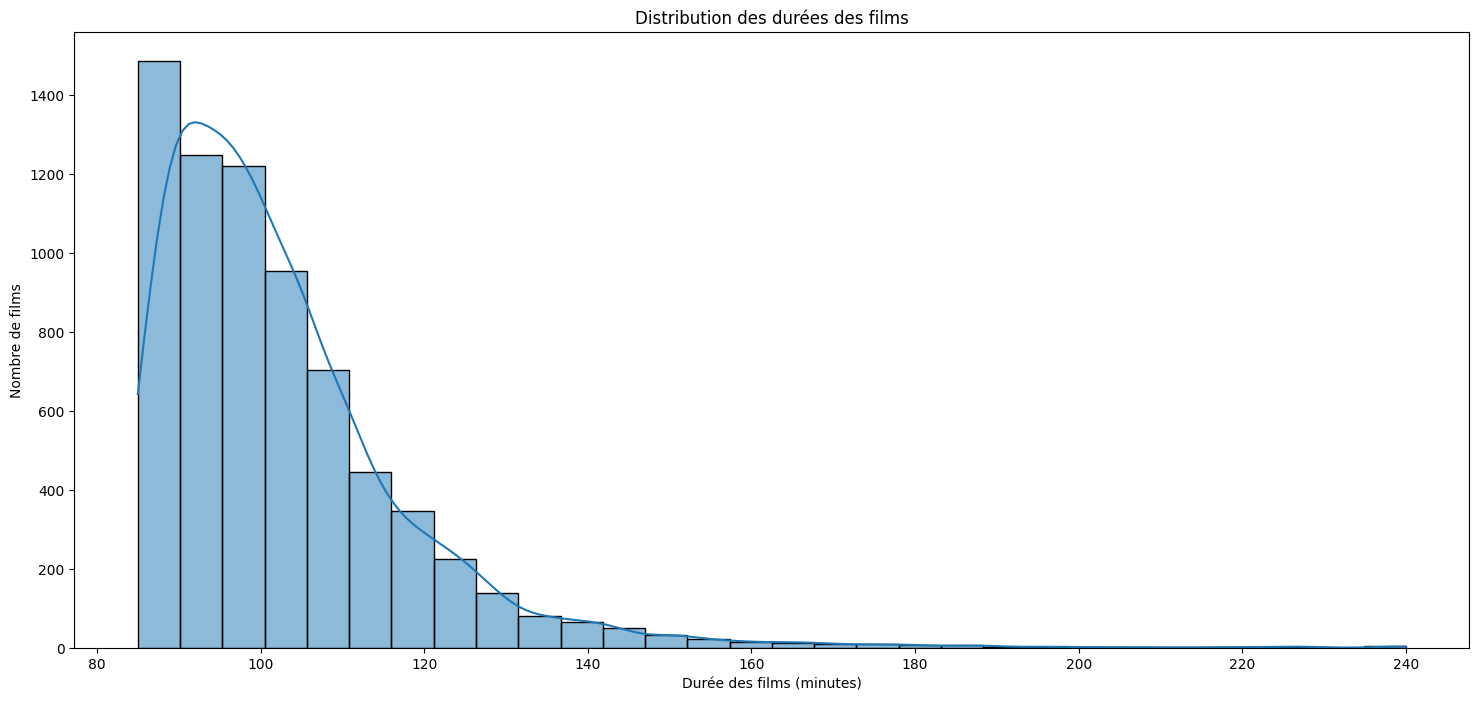

In [ ]:
# Distribution des durées des films par le nombre de films

plt.figure(figsize=(18, 8))
sns.histplot(df_merged['runtimeMinutes'], bins=30, kde=True)
plt.title('Distribution des durées des films')
plt.xlabel('Durée des films (minutes)')
plt.ylabel('Nombre de films')
plt.show()



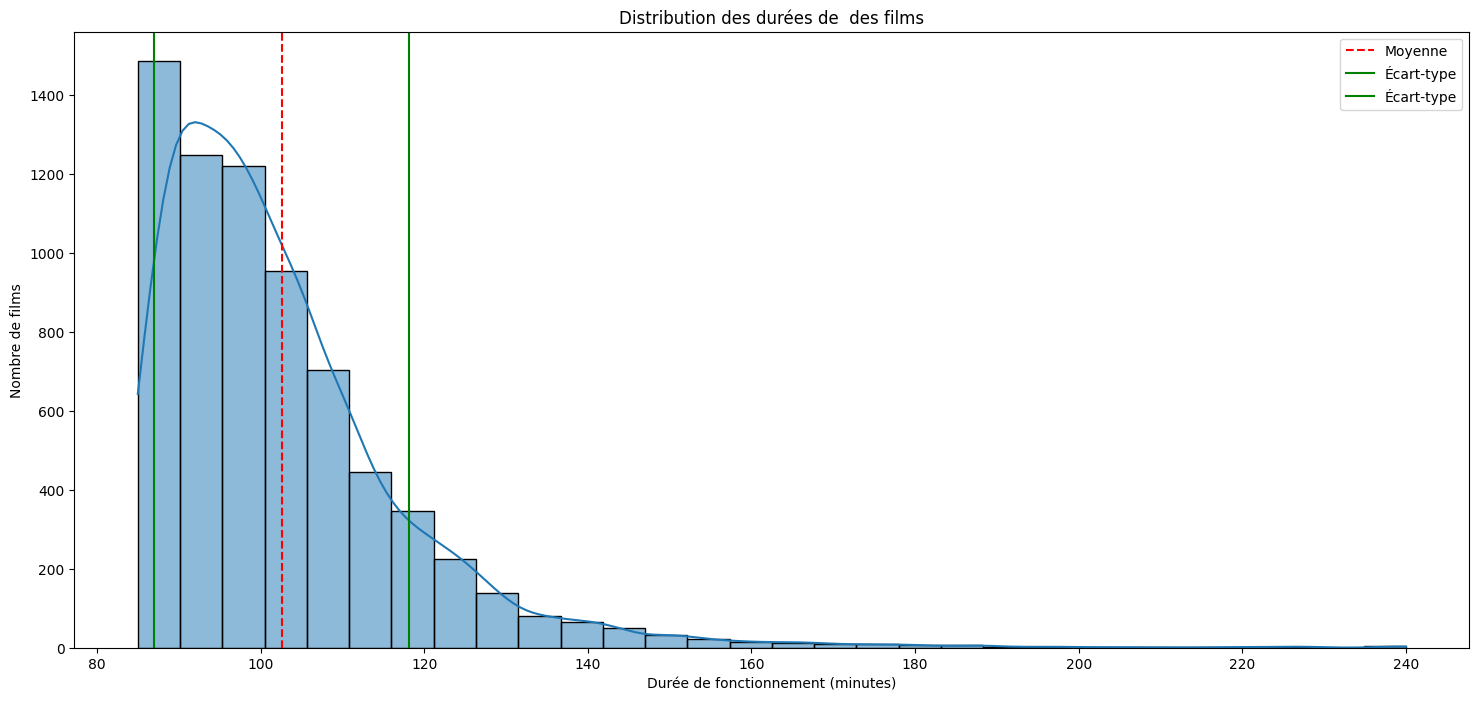

In [ ]:
# Calcul de la moyenne et de l'écart-type

plt.figure(figsize=(18, 8))
sns.histplot(df_merged['runtimeMinutes'], bins=30, kde=True)
plt.title('Distribution des durées de  des films')
plt.xlabel('Durée de fonctionnement (minutes)')
plt.ylabel('Nombre de films')

# Calcul de la moyenne et de l'écart-type
mean = df_merged['runtimeMinutes'].mean()
std_dev = df_merged['runtimeMinutes'].std()

# Tracer la moyenne et les lignes pour l'écart-type
plt.axvline(mean, color='r', linestyle='--', label='Moyenne')
plt.axvline(mean + std_dev, color='g', linestyle='-', label='Écart-type')
plt.axvline(mean - std_dev, color='g', linestyle='-', label='Écart-type')

plt.legend()
plt.show()


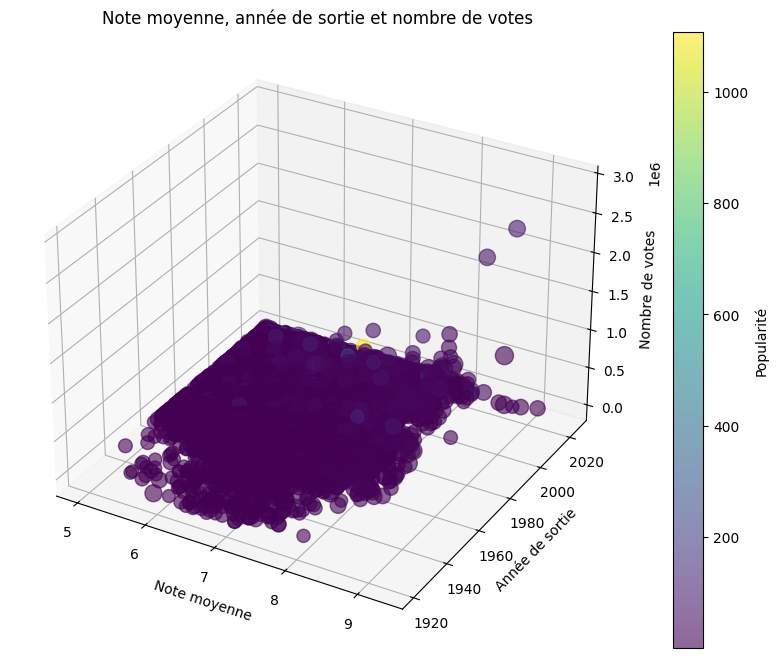

In [ ]:
# Note moyenne, année de sortie et nombre de votes
plt.figure(figsize=(12, 8))
ax = plt.subplot(111, projection='3d')
x = df_merged['averageRating']
y = df_merged['startYear']
z = df_merged['numVotes']
colors = df_merged['popularity']
sizes = df_merged['runtimeMinutes']

scatter = ax.scatter(x, y, z, c=colors, s=sizes, alpha=0.6)

ax.set_xlabel('Note moyenne')
ax.set_ylabel('Année de sortie')
ax.set_zlabel('Nombre de votes')

colorbar = plt.colorbar(scatter)
colorbar.set_label('Popularité')

plt.title('Note moyenne, année de sortie et nombre de votes')

plt.show()
